In [1]:
import os
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [8]:
cd /content/drive/MyDrive/Colab Notebooks/Github

/content/drive/MyDrive/Colab Notebooks/Github


In [9]:
cd /content/drive/MyDrive/Colab Notebooks/Github/Trafic_Data_Analysis_Contest/JooYoung

/content/drive/MyDrive/Colab Notebooks/Github/Trafic_Data_Analysis_Contest/JooYoung


In [13]:
!git add .

In [18]:
!git commit -m "Connect Google Colab and Drive"

[main 1d1be40] Connect Google Colab and Drive
 2 files changed, 2 insertions(+), 1 deletion(-)
 create mode 100644 "JooYoung/\341\204\214\341\205\265\341\204\213\341\205\247\341\206\250 \341\204\216\341\205\265\341\204\213\341\205\241\341\206\253 \341\204\213\341\205\241\341\206\253\341\204\214\341\205\245\341\206\253 \341\204\203\341\205\246\341\204\213\341\205\265\341\204\220\341\205\245 \341\204\207\341\205\256\341\206\253\341\204\211\341\205\245\341\206\250 \341\204\200\341\205\247\341\206\274\341\204\214\341\205\265\341\206\253\341\204\203\341\205\242\341\204\222\341\205\254.ipynb"
 rewrite "JooYoung/\354\247\200\354\227\255 \354\271\230\354\225\210 \354\225\210\354\240\204 \353\215\260\354\235\264\355\204\260 \353\266\204\354\204\235 \352\262\275\354\247\204\353\214\200\355\232\214.ipynb" (90%)


In [17]:
!git config --global user.email "rozi0901@hufs.ac.kr"
!git config --global user.name "jooyoungkim97"

In [19]:
!git status

On branch main
Your branch is ahead of 'origin/main' by 1 commit.
  (use "git push" to publish your local commits)

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   "\341\204\214\341\205\265\341\204\213\341\205\247\341\206\250 \341\204\216\341\205\265\341\204\213\341\205\241\341\206\253 \341\204\213\341\205\241\341\206\253\341\204\214\341\205\245\341\206\253 \341\204\203\341\205\246\341\204\213\341\205\265\341\204\220\341\205\245 \341\204\207\341\205\256\341\206\253\341\204\211\341\205\245\341\206\250 \341\204\200\341\205\247\341\206\274\341\204\214\341\205\265\341\206\253\341\204\203\341\205\242\341\204\222\341\205\254.ipynb"
	modified:   "\354\247\200\354\227\255 \354\271\230\354\225\210 \354\225\210\354\240\204 \353\215\260\354\235\264\355\204\260 \353\266\204\354\204\235 \352\262\275\354\247\204\353\214\200\355\232\214.ipynb"

Untracked files:
  (use "git 

In [20]:
!git push -u origin main

Enumerating objects: 6, done.
Counting objects: 100% (6/6), done.
Delta compression using up to 2 threads
Compressing objects: 100% (4/4), done.
Writing objects: 100% (4/4), 56.49 KiB | 3.32 MiB/s, done.
Total 4 (delta 0), reused 0 (delta 0)
To https://github.com/jooyoungkim97/Trafic_Data_Analysis_Contest.git
   4ef8612..1d1be40  main -> main
Branch 'main' set up to track remote branch 'main' from 'origin'.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
import statsmodels.api as sm
from sklearn.ensemble import AdaBoostRegressor
from statsmodels.stats.outliers_influence import variance_inflation_factor # RMSE 
from sklearn.metrics import mean_squared_error

In [ ]:
warnings.simplefilter(action='ignore')
pd.set_option('display.max_columns', None)

# Data Dictionary

## KP Column 설명
- RECV_DEPT_NM : 접수부서 코드 ☆
- RECV_CPLT_DM : 접수완료 일시
- NPA_CL : 경찰청 구분 ☆
- EVT_STAT_CD : 사건 상태 코드
- EVT_CL_CD : 사건종별코드
- RPTER_SEX : 신고 성별 (남 : 1 / 여 : 2 / 불상 : 3)
- HPPN_PNU_ADDR : 발생지점(PNU)
- HPPN_X : 발생좌표X
- HPPN_Y : 발생좌표Y
- SME_EVT_YN : 동일사건여부 

## NPA Column 설명
- RECV_CPLT_DT : 접수완료일자
- RECV_CPLT_TM : 접수완료시간
- NPA_CL : 경찰청 구분 ☆
- EVT_STAT_CD : 사건 상태 코드
- EVT_CL_CD : 사건종별코드
- RPTER_SEX : 신고 성별 (남 : 1 / 여 : 2 / 불상 : 3)
- HPPN_PNU_ADDR : 발생지점(PNU)
- HPPN_X : 발생좌표X
- HPPN_Y : 발생좌표Y
- SME_EVT_YN : 동일사건여부 

In [ ]:
KP2020 = pd.read_csv("./drive/MyDrive/공모전/지역 치안 안전 데이터 분석 경진대회/KP2020.csv", encoding='cp949')
KP2020

,RECV_DEPT_NM,RECV_CPLT_DM,NPA_CL,EVT_STAT_CD,EVT_CL_CD,RPTER_SEX,HPPN_PNU_ADDR,HPPN_X,HPPN_Y,SME_EVT_YN
0,충남청,20/12/01 01:43:07.000000000,19,10,305,1.0,충청남도 보령시 궁촌동(행정:대천4동) 369,126.598345,36.341537,Y
1,대전청,20/12/01 02:05:04.000000000,13,10,601,3.0,NaN,127.404663,36.341685,NaN
2,대전청,20/12/01 02:06:52.000000000,13,10,601,1.0,NaN,127.404663,36.341685,NaN
3,충남청,20/12/01 02:37:25.000000000,19,10,606,3.0,충청남도 보령시 천북면 하만리 628-10,126.524980,36.474390,N
4,충남청,20/12/01 08:17:50.000000000,19,10,401,2.0,충청남도 천안시 서북구 성정동(행정:성정2동) 1259,127.137160,36.826718,NaN
...,...,...,...,...,...,...,...,...,...,...
77072,충남청,20/12/31 01:18:16.000000000,19,10,302,2.0,충청남도 보령시 주교면 주교리(행정:주교면) 191-6,126.571002,36.387791,NaN
77073,충남청,20/12/31 01:17:45.000000000,19,10,501,3.0,NaN,NaN,NaN,NaN
77074,충남청,20/12/31 00:13:50.000000000,19,10,604,3.0,충청남도 아산시 온천동(행정:온양1동) 1498,127.000391,36.788411,NaN
77075,대전청,20/12/31 00:49:29.000000000,13,10,302,2.0,대전광역시 서구 갈마동(행정:갈마2동) 975,127.373351,36.348051,Y


In [ ]:
KP2021 = pd.read_csv("./drive/MyDrive/공모전/지역 치안 안전 데이터 분석 경진대회/KP2021.csv", encoding = 'cp949')
KP2021

,RECV_DEPT_NM,RECV_CPLT_DM,NPA_CL,EVT_STAT_CD,EVT_CL_CD,RPTER_SEX,HPPN_PNU_ADDR,HPPN_X,HPPN_Y,SME_EVT_YN
0,대전청,21/03/07 00:00:01.000000000,13,10,604,3.0,대전광역시 서구 둔산동 1122,127.373676,36.350975,Y
1,대전청,21/03/07 00:02:13.000000000,13,10,201,1.0,대전광역시 유성구 상대동(원신흥동) 469-9,127.339018,36.347420,NaN
2,대전청,21/03/07 00:00:33.000000000,13,10,601,3.0,NaN,127.404663,36.341685,NaN
3,대전청,21/03/07 00:01:18.000000000,13,10,601,3.0,NaN,127.404663,36.341685,NaN
4,대전청,21/03/07 00:01:43.000000000,13,10,308,1.0,대전광역시 중구 선화동 141-16,127.420455,36.330413,NaN
...,...,...,...,...,...,...,...,...,...,...
2594055,대전청,23/01/12 11:23:09.000000000,13,10,104,1.0,대전광역시 유성구 봉명동 (행정:원신흥동 ) 1016-7,127.344600,36.352272,NaN
2594056,충남청,23/01/16 11:59:47.000000000,19,10,307,2.0,충청남도 서산시 음암면 부장리(음암면 ) 560-4,126.514047,36.785626,NaN
2594057,충남청,23/01/16 11:58:54.000000000,19,10,601,3.0,NaN,NaN,NaN,NaN
2594058,충남청,23/01/14 01:00:47.000000000,19,10,601,3.0,NaN,NaN,NaN,NaN


In [ ]:
NPA2020 = pd.read_csv("./drive/MyDrive/공모전/지역 치안 안전 데이터 분석 경진대회/NPA2020.csv", encoding = 'cp949')
NPA2020

,RECV_CPLT_DT,RECV_CPLT_TM,NPA_CL,EVT_STAT_CD,EVT_CL_CD,RPTER_SEX,HPPN_OLD_ADDR,HPPN_X,HPPN_Y,SME_EVT_YN
0,20200101,7,13,10,501,2,대전광역시 중구 목동(행정:목동) 360,127.409270,36.333010,Y
1,20200101,132,13,10,501,1,대전광역시 중구 대흥동(대흥동) 499-1,127.421295,36.325575,NaN
2,20200101,39,13,10,501,1,NaN,127.404663,36.341685,NaN
3,20200101,110,13,10,601,3,NaN,0.000000,0.000000,NaN
4,20200101,342,13,10,601,1,NaN,127.404663,36.341685,NaN
...,...,...,...,...,...,...,...,...,...,...
1178239,20201122,3505,19,10,501,1,,NaN,NaN,
1178240,20201122,5213,13,10,601,,,127.404663,36.341685,
1178241,20201122,4627,19,10,601,1,,NaN,NaN,Y
1178242,20201122,5246,19,5,301,1,충청남도 보령시 신흑동(행정:대천5동),126.516040,36.305619,


In [ ]:
NPA2020['NPA_CL'].unique

<bound method Series.unique of 0          13
1          13
2          13
3          13
4          13
           ..
1178239    19
1178240    13
1178241    19
1178242    19
1178243    13
Name: NPA_CL, Length: 1178244, dtype: int64>

In [ ]:
NPA2020['RPTER_SEX'].unique()

array(['2', '1', '3', '{', ' '], dtype=object)

In [ ]:
KP2020.isna().sum()

RECV_DEPT_NM         0
RECV_CPLT_DM         0
NPA_CL               0
EVT_STAT_CD          0
EVT_CL_CD            0
RPTER_SEX         2419
HPPN_PNU_ADDR    29272
HPPN_X           16764
HPPN_Y           16764
SME_EVT_YN       63635
dtype: int64

In [ ]:
KP2021.isna().sum()

RECV_DEPT_NM           0
RECV_CPLT_DM           0
NPA_CL                 0
EVT_STAT_CD            0
EVT_CL_CD              0
RPTER_SEX          23894
HPPN_PNU_ADDR    1072094
HPPN_X            694401
HPPN_Y            694401
SME_EVT_YN       2079123
dtype: int64

In [ ]:
NPA2020.isna().sum()

RECV_CPLT_DT          0
RECV_CPLT_TM          0
NPA_CL                0
EVT_STAT_CD           0
EVT_CL_CD             0
RPTER_SEX             0
HPPN_OLD_ADDR    258593
HPPN_X           101653
HPPN_Y           101653
SME_EVT_YN       596801
dtype: int64

- RECV_DEPT_NM : 버려도 될 듯
- RPTER_SEX : INT(FLOAT)로 통일
- HPPN_PNU_ADDR : 버려도 될 듯
- SEX : NAN값 -> 3으로 바꾸기

- HPPN_X, HPPN_Y : 위도 경도 결측치
- SME_EVT_YN : 결측치 N으로 바꾸기

- RECV_CPLT_DT, RECV_CPLT_TM : 년도 / 월 / 일 / 시 / 분 / 초 단위로 나누기
- RECV_CPLT_DM : 년도 / 월 / 일 / 시 / 분 / 초 단위로 나누기
- 신무진

- EVT_CL_CD : 종별 코드 → 보이스피싱 / 교통사고 분류 : 4인거만 찾아내기

In [ ]:
x = NPA2020[NPA2020['EVT_CL_CD'] < 500]
y = x[x['EVT_CL_CD'] > 400]
NPA2020 = y

x = KP2021[KP2021['EVT_CL_CD'] < 500]
y = x[x['EVT_CL_CD'] > 400]
KP2021 = y

x = KP2020[KP2020['EVT_CL_CD'] < 500]
y = x[x['EVT_CL_CD'] > 400]
KP2020 = y

KP2020.drop('RECV_DEPT_NM', axis = 1, inplace = True)
KP2021.drop('RECV_DEPT_NM', axis = 1, inplace = True)
KP2020.drop('HPPN_PNU_ADDR', axis = 1, inplace = True)
KP2021.drop('HPPN_PNU_ADDR', axis = 1, inplace = True)
NPA2020.drop('HPPN_OLD_ADDR', axis = 1, inplace = True)
#드롭

NPA2020 = NPA2020.drop([42819, 250145, 551827, 609589, 659384, 767378, 802443, 838056, 1044961])

NPA2020["RPTER_SEX"] = NPA2020["RPTER_SEX"].fillna(3).astype(int)
KP2020["RPTER_SEX"] = KP2020["RPTER_SEX"].fillna(3).astype(int)
KP2021["RPTER_SEX"] = KP2021["RPTER_SEX"].fillna(3).astype(int)

#SEX : NAN값 -> 3으로 바꾸기

In [ ]:
KP2020['RECV_CPLT_DM'] = KP2020['RECV_CPLT_DM'].astype(str)

def add_20(a):
    return '20'+ a

KP2020['TIME'] = KP2020['RECV_CPLT_DM'].apply(add_20)

# 년
KP2020['YEAR'] =  pd.to_datetime(KP2020['TIME']).dt.year

# 월
KP2020['MONTH'] =  pd.to_datetime(KP2020['TIME']).dt.month

# 일
KP2020['DAY'] =  pd.to_datetime(KP2020['TIME']).dt.day

# 시
KP2020['HOUR'] =  pd.to_datetime(KP2020['TIME']).dt.hour

# 분
KP2020['MINUTE'] =  pd.to_datetime(KP2020['TIME']).dt.minute

# 초
KP2020['SECOND'] =  pd.to_datetime(KP2020['TIME']).dt.second

# 원래 시간 컬럼 삭제
KP2020 = KP2020.drop(['RECV_CPLT_DM','TIME'], axis = 1)

KP2021['RECV_CPLT_DM'] = KP2021['RECV_CPLT_DM'].astype(str)

KP2021['TIME'] = KP2021['RECV_CPLT_DM'].apply(add_20)

# 년
KP2021['YEAR'] =  pd.to_datetime(KP2021['TIME']).dt.year

# 월
KP2021['MONTH'] =  pd.to_datetime(KP2021['TIME']).dt.month

# 일
KP2021['DAY'] =  pd.to_datetime(KP2021['TIME']).dt.day

# 시
KP2021['HOUR'] =  pd.to_datetime(KP2021['TIME']).dt.hour

# 분
KP2021['MINUTE'] =  pd.to_datetime(KP2021['TIME']).dt.minute

# 초
KP2021['SECOND'] =  pd.to_datetime(KP2021['TIME']).dt.second

# 원래 시간 컬럼 삭제
KP2021= KP2021.drop(['RECV_CPLT_DM','TIME'], axis = 1)


NPA2020['RECV_CPLT_DT'] = NPA2020['RECV_CPLT_DT'].astype(str)


def silce_year(a):
    return a[:4]
def silce_month(a):
    return a[4:6]
def silce_day(a):
    return a[6:]

# 년
NPA2020['YEAR'] = NPA2020['RECV_CPLT_DT'].apply(silce_year)
NPA2020['YEAR']
# 월
NPA2020['MONTH'] = NPA2020['RECV_CPLT_DT'].apply(silce_month)
NPA2020['MONTH']
# 일
NPA2020['DAY'] = NPA2020['RECV_CPLT_DT'].apply(silce_day)
NPA2020['DAY']

NPA2020['RECV_CPLT_TM'] = NPA2020['RECV_CPLT_TM'].astype(str)


def add_00(a):
    if len(a) == 6:
        return a
    elif len(a) == 5:
        return '0' + a
    elif len(a) == 4:
        return '0' * 2 + a
    elif len(a) == 3:
        return '0' * 3 + a
    elif len(a) == 2:
        return '0' * 4 + a
    else:
        return '0' * 5 + a

NPA2020['TIME'] = NPA2020['RECV_CPLT_TM'].apply(add_00)
NPA2020['TIME']

def silce_hour(a):
    return a[:2]

def silce_min(a):
    return a[2:4]

def silce_sec(a):
    return a[4:]

# 시
NPA2020['HOUR'] = NPA2020['TIME'].apply(silce_hour)
NPA2020['HOUR']

# 분
NPA2020['MINUTE'] = NPA2020['TIME'].apply(silce_min)
NPA2020['MINUTE']

# 초
NPA2020['SECOND'] = NPA2020['TIME'].apply(silce_sec)
NPA2020['SECOND']

# 원래 시간 컬럼 삭제
NPA2020 = NPA2020.drop(['TIME', 'RECV_CPLT_TM', 'RECV_CPLT_DT'], axis = 1)

In [ ]:
NPA2020[NPA2020['HPPN_X'].isna()]['HPPN_Y'].sum()

0.0

In [ ]:
NPA2020[NPA2020['HPPN_Y'].isna()]['HPPN_X'].sum()

0.0

In [ ]:
KP2021.isna().sum()

NPA_CL              0
EVT_STAT_CD         0
EVT_CL_CD           0
RPTER_SEX           0
HPPN_X           1733
HPPN_Y           1733
SME_EVT_YN     211361
YEAR                0
MONTH               0
DAY                 0
HOUR                0
MINUTE              0
SECOND              0
dtype: int64

In [ ]:
KP2021[KP2021['HPPN_X'].isna()]['HPPN_Y'].sum()

0.0

In [ ]:
KP2021[KP2021['HPPN_Y'].isna()]['HPPN_X'].sum()

0.0

In [ ]:
KP2020.isna().sum()

NPA_CL            0
EVT_STAT_CD       0
EVT_CL_CD         0
RPTER_SEX         0
HPPN_X          133
HPPN_Y          133
SME_EVT_YN     7438
YEAR              0
MONTH             0
DAY               0
HOUR              0
MINUTE            0
SECOND            0
dtype: int64

In [ ]:
KP2020[KP2020['HPPN_X'].isna()]['HPPN_Y'].sum()

0.0

In [ ]:
KP2020[KP2020['HPPN_Y'].isna()]['HPPN_X'].sum()

0.0

In [ ]:
# 위도, 경도 결측치 행 제거
KP2020 = KP2020.dropna(subset = ['HPPN_X','HPPN_Y'])
KP2021 = KP2021.dropna(subset = ['HPPN_X','HPPN_Y'])
NPA2020 = NPA2020.dropna(subset = ['HPPN_X','HPPN_Y'])

# 결측치 N으로 바꾸기
KP2020['SME_EVT_YN'] = KP2020['SME_EVT_YN'].fillna('N')
KP2021['SME_EVT_YN'] = KP2021['SME_EVT_YN'].fillna('N')
NPA2020['SME_EVT_YN'] = NPA2020['SME_EVT_YN'].fillna('N')

In [ ]:
NPA2020.isna().sum()

NPA_CL         0
EVT_STAT_CD    0
EVT_CL_CD      0
RPTER_SEX      0
HPPN_X         0
HPPN_Y         0
SME_EVT_YN     0
YEAR           0
MONTH          0
DAY            0
HOUR           0
MINUTE         0
SECOND         0
dtype: int64

In [ ]:
KP2021.isna().sum()

NPA_CL         0
EVT_STAT_CD    0
EVT_CL_CD      0
RPTER_SEX      0
HPPN_X         0
HPPN_Y         0
SME_EVT_YN     0
YEAR           0
MONTH          0
DAY            0
HOUR           0
MINUTE         0
SECOND         0
dtype: int64

In [ ]:
KP2020.isna().sum()

NPA_CL         0
EVT_STAT_CD    0
EVT_CL_CD      0
RPTER_SEX      0
HPPN_X         0
HPPN_Y         0
SME_EVT_YN     0
YEAR           0
MONTH          0
DAY            0
HOUR           0
MINUTE         0
SECOND         0
dtype: int64

In [ ]:
def N_rep(x):
    if x == ' ':
        return 'N'
    else:
        return x

In [ ]:
NPA2020['SME_EVT_YN'] = NPA2020['SME_EVT_YN'].apply(N_rep)
NPA2020['SME_EVT_YN']

38         N
41         N
54         N
66         N
117        N
          ..
1178083    N
1178086    Y
1178143    N
1178173    Y
1178234    N
Name: SME_EVT_YN, Length: 140958, dtype: object

In [ ]:
NPA2020['SME_EVT_YN'].value_counts()

N    121179
Y     19779
Name: SME_EVT_YN, dtype: int64

In [ ]:
KP2021

,NPA_CL,EVT_STAT_CD,EVT_CL_CD,RPTER_SEX,HPPN_X,HPPN_Y,SME_EVT_YN,YEAR,MONTH,DAY,HOUR,MINUTE,SECOND
14,19,10,406,1,127.107500,36.811944,N,2021,3,7,0,2,48
20,19,10,402,1,127.150988,36.811792,Y,2021,3,7,0,9,4
23,13,10,401,2,127.371854,36.341961,N,2021,3,7,0,7,54
26,13,10,401,1,127.339334,36.346899,N,2021,3,7,0,15,27
44,19,10,403,2,127.090733,36.453397,N,2021,3,7,0,12,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2593994,13,10,401,1,127.384284,36.334507,N,2023,1,15,20,1,39
2594002,19,10,401,1,126.262393,36.751467,N,2023,1,16,21,26,56
2594006,19,10,403,2,127.147678,36.789125,N,2023,1,14,1,2,48
2594019,13,10,401,1,127.433785,36.450725,N,2023,1,14,17,35,38


In [ ]:
KP2020

,NPA_CL,EVT_STAT_CD,EVT_CL_CD,RPTER_SEX,HPPN_X,HPPN_Y,SME_EVT_YN,YEAR,MONTH,DAY,HOUR,MINUTE,SECOND
4,19,10,401,2,127.137160,36.826718,N,2020,12,1,8,17,50
7,13,10,406,1,127.341551,36.353696,N,2020,12,1,3,24,26
8,19,10,402,1,127.136142,36.917900,N,2020,12,1,7,37,18
9,13,10,401,1,127.447545,36.306724,N,2020,12,1,7,8,44
10,13,10,401,2,127.447175,36.306694,N,2020,12,1,7,9,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
77024,19,10,406,1,126.298968,36.747649,Y,2020,12,31,0,16,14
77036,13,10,401,1,127.428343,36.324386,N,2020,12,31,1,8,43
77066,19,10,406,1,126.298968,36.747649,Y,2020,12,31,0,26,16
77068,13,10,401,1,127.369099,36.312971,N,2020,12,31,1,17,1


In [ ]:
c = pd.concat([KP2020, KP2021])
data = pd.concat([c, NPA2020])
data

,NPA_CL,EVT_STAT_CD,EVT_CL_CD,RPTER_SEX,HPPN_X,HPPN_Y,SME_EVT_YN,YEAR,MONTH,DAY,HOUR,MINUTE,SECOND
4,19,10,401,2,127.137160,36.826718,N,2020,12,1,8,17,50
7,13,10,406,1,127.341551,36.353696,N,2020,12,1,3,24,26
8,19,10,402,1,127.136142,36.917900,N,2020,12,1,7,37,18
9,13,10,401,1,127.447545,36.306724,N,2020,12,1,7,8,44
10,13,10,401,2,127.447175,36.306694,N,2020,12,1,7,9,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1178083,13,7,406,1,127.404540,36.325219,N,2020,11,22,00,20,07
1178086,13,5,401,1,127.446090,36.320140,Y,2020,11,22,00,40,08
1178143,19,5,406,3,127.107617,36.813773,N,2020,11,22,00,57,19
1178173,13,5,401,1,127.446090,36.320140,Y,2020,11,22,00,37,53


## data column 설명

- NPA_CL : 경찰청 구분 ☆
- EVT_STAT_CD : 사건 상태 코드
- EVT_CL_CD : 사건종별코드
- RPTER_SEX : 신고 성별 (남 : 1 / 여 : 2 / 불상 : 3)
- HPPN_X : 발생좌표X
- HPPN_Y : 발생좌표Y
- SME_EVT_YN : 동일사건여부 
- YEAR : 접수 완료 연도
- MONTH : 접수 완료 월
- DAY : 접수 완료 일
- HOUR : 접수 완료 시
- MINUTE : 접수 완료 분
- SECOND : 접수 완료 초

# EDA

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 426761 entries, 4 to 1178234
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   NPA_CL       426761 non-null  int64  
 1   EVT_STAT_CD  426761 non-null  int64  
 2   EVT_CL_CD    426761 non-null  int64  
 3   RPTER_SEX    426761 non-null  int64  
 4   HPPN_X       426761 non-null  float64
 5   HPPN_Y       426761 non-null  float64
 6   SME_EVT_YN   426761 non-null  object 
 7   YEAR         426761 non-null  object 
 8   MONTH        426761 non-null  object 
 9   DAY          426761 non-null  object 
 10  HOUR         426761 non-null  object 
 11  MINUTE       426761 non-null  object 
 12  SECOND       426761 non-null  object 
dtypes: float64(2), int64(4), object(7)
memory usage: 45.6+ MB


In [ ]:
data['NPA_CL'].unique()

array([19, 13, 31, 21, 11, 18, 15, 20, 10, 16,  8, 17, 22, 23, 12, 14,  9,
       24])

In [ ]:
count_by_NPA_CL = data['NPA_CL'].value_counts()
count_by_NPA_CL

19    248118
13    156473
31     16662
18      2353
15      1978
20       679
21       143
8        116
11        73
16        35
22        34
10        19
17        18
23        18
9         14
12        12
24         9
14         7
Name: NPA_CL, dtype: int64

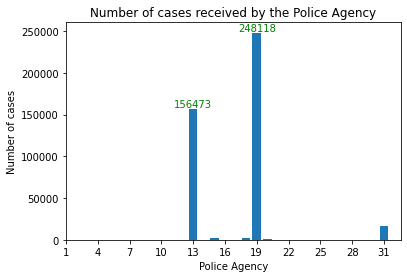

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.bar(count_by_NPA_CL.index, count_by_NPA_CL.values)
plt.title('Number of cases received by the Police Agency')
plt.xlabel('Police Agency')
plt.ylabel('Number of cases')
plt.xticks(range(1,32,3))
for idx, val in count_by_NPA_CL[0:2].items():
    plt.annotate(val, (idx,val), xytext = (0,2), textcoords='offset points', fontsize=10, ha='center',color='green')
plt.show()

- 충남청 : 19, 대전청 : 13 의 사건 접수 수가 압도적으로 많음
- 대전, 충남, 세종시의 치안 안전 데이터에 기반하였기 때문인 듯

In [ ]:
chungnam = data[data['NPA_CL'] == 19]
chungnam_EVT_CL = chungnam['EVT_CL_CD']
count_by_chungnam = chungnam_EVT_CL.value_counts()
count_by_chungnam

401    147766
406     45831
402     32604
403     21874
405        23
404        20
Name: EVT_CL_CD, dtype: int64

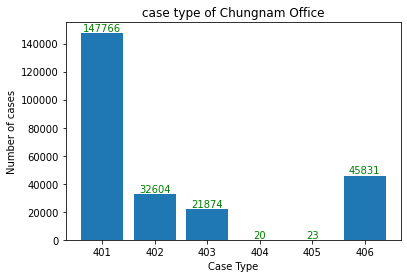

In [ ]:
plt.bar(count_by_chungnam.index, count_by_chungnam.values)
plt.title('case type of Chungnam Office')
plt.xlabel('Case Type')
plt.ylabel('Number of cases')
for idx, val in count_by_chungnam[::].items():
    plt.annotate(val, (idx,val), xytext = (0,2), textcoords='offset points', fontsize=10, ha='center',color='green')
plt.show()

충남청의 사건 종별 발생 수를 나타냄
- 401 : 교통사고
- 406 : 음주운전
- 402 : 교통불편
- 403 : 교통위반

In [ ]:
daejeon = data[data['NPA_CL'] == 13]
daejeon_EVT_CL = daejeon['EVT_CL_CD']
count_by_daejeon = daejeon_EVT_CL.value_counts()
count_by_daejeon

401    103472
402     23809
406     18201
403     10973
405        17
404         1
Name: EVT_CL_CD, dtype: int64

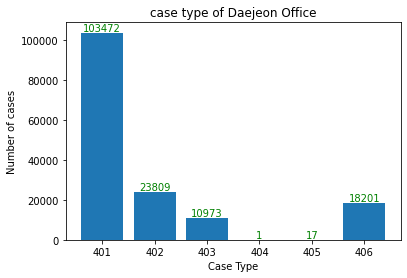

In [ ]:
plt.bar(count_by_daejeon.index, count_by_daejeon.values)
plt.title('case type of Daejeon Office')
plt.xlabel('Case Type')
plt.ylabel('Number of cases')
for idx, val in count_by_daejeon[::].items():
    plt.annotate(val, (idx,val), xytext = (0,2), textcoords='offset points', fontsize=10, ha='center',color='green')
plt.show()

대전청의 사건 종별 발생 수를 나타냄
- 401 : 교통사고
- 402 : 교통불편
- 406 : 음주운전
- 403 : 교통위반

In [ ]:
count_by_year_chungnam = chungnam['YEAR'].value_counts()
count_by_year_chungnam

2020    90934
2022    78931
2021    70233
2020     4720
2023     3300
Name: YEAR, dtype: int64

In [ ]:
chungnam['YEAR'].unique()

array([2020, 2021, 2022, 2023, '2020'], dtype=object)

In [ ]:
count_by_month_chungnam = chungnam['MONTH'].value_counts()
count_by_month_chungnam

12    17370
10    14777
9     14613
11    13928
8     13406
7     13205
5     13183
6     12924
1     12610
4     11839
3     10515
07     9514
08     9298
09     9257
10     9091
05     8982
06     8967
2      8814
01     8064
04     7545
02     7077
03     6888
11     6251
Name: MONTH, dtype: int64

In [ ]:
chungnam['MONTH'].unique()

array([12, 3, 1, 2, 4, 10, 9, 5, 6, 8, 7, 11, '01', '02', '03', '04',
       '06', '05', '07', '08', '09', '10', '11'], dtype=object)

In [ ]:
count_by_hour_chungnam = chungnam['HOUR'].value_counts()
count_by_hour_chungnam

18    10791
17     9656
21     9272
15     8851
16     8735
22     8725
14     8724
20     8436
19     8401
13     8045
12     7519
11     7268
23     7086
10     6629
8      6340
0      6285
9      6174
18     6115
17     5839
16     5598
14     5487
15     5443
13     5176
19     4844
11     4612
12     4557
10     4544
20     4527
1      4499
21     4266
7      4151
22     4091
09     4058
08     3799
23     3370
2      3041
00     2949
6      2562
07     2549
3      2310
01     2252
5      1849
4      1835
02     1762
06     1559
03     1339
04     1122
05     1076
Name: HOUR, dtype: int64

In [ ]:
chungnam['HOUR'].unique()

array([8, 7, 1, 2, 0, 14, 12, 3, 15, 13, 11, 10, 9, 17, 16, 6, 4, 5, 20,
       21, 18, 19, 22, 23, '03', '05', '01', '02', '06', '04', '07', '00',
       '18', '20', '22', '19', '21', '23', '17', '14', '16', '08', '11',
       '12', '15', '09', '10', '13'], dtype=object)

In [ ]:
chungnam['HPPN_X'].describe()

count    248118.000000
mean        125.322871
std          14.287035
min           0.000000
25%         126.677958
50%         127.068175
75%         127.141199
max         129.418366
Name: HPPN_X, dtype: float64

In [ ]:
chungnam['HPPN_Y'].describe()

count    248118.000000
mean         36.194962
std           4.132548
min           0.000000
25%          36.483283
50%          36.776440
75%          36.823257
max          38.210578
Name: HPPN_Y, dtype: float64

In [ ]:
chungnam['HPPN_X'].value_counts()

0.000000      3182
127.137808     202
127.180888     161
127.108062     153
127.153932     135
              ... 
126.632310       1
126.351496       1
127.053838       1
127.158295       1
127.173382       1
Name: HPPN_X, Length: 157778, dtype: int64

In [ ]:
chungnam['HPPN_Y'].value_counts()

0.000000     3182
36.830373     202
36.855407     160
36.817772     150
36.798760     137
             ... 
36.890958       1
36.925118       1
36.061955       1
36.802349       1
36.841991       1
Name: HPPN_Y, Length: 158055, dtype: int64

In [ ]:
chungnam_v1 = chungnam[(chungnam['HPPN_X'] > 126) &  (chungnam['HPPN_X'] < 127.4) & (chungnam['HPPN_Y'] > 36) & (chungnam['HPPN_Y'] < 37)]
chungnam_v1

,NPA_CL,EVT_STAT_CD,EVT_CL_CD,RPTER_SEX,HPPN_X,HPPN_Y,SME_EVT_YN,YEAR,MONTH,DAY,HOUR,MINUTE,SECOND
4,19,10,401,2,127.137160,36.826718,N,2020,12,1,8,17,50
8,19,10,402,1,127.136142,36.917900,N,2020,12,1,7,37,18
11,19,10,402,1,126.807222,36.395000,N,2020,12,1,8,21,8
28,19,10,406,1,127.055248,36.773785,Y,2020,12,1,1,8,51
31,19,10,401,1,126.412290,36.967612,N,2020,12,1,1,36,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1178016,19,10,406,1,127.159432,36.800444,N,2020,11,22,00,02,49
1178057,19,5,406,1,127.125278,36.919444,N,2020,11,22,00,10,47
1178067,19,5,406,1,127.005016,36.784637,N,2020,11,22,00,53,35
1178143,19,5,406,3,127.107617,36.813773,N,2020,11,22,00,57,19


In [ ]:
chungnam_v1.describe()

,NPA_CL,EVT_STAT_CD,EVT_CL_CD,RPTER_SEX,HPPN_X,HPPN_Y
count,236606.0,236606.000000,236606.000000,236606.000000,236606.000000,236606.000000
mean,19.0,9.983825,402.235607,1.398612,126.937302,36.674615
std,0.0,0.271752,1.899125,0.673383,0.275013,0.229452
min,19.0,2.000000,401.000000,1.000000,126.124849,36.000009
25%,19.0,10.000000,401.000000,1.000000,126.682715,36.518584
50%,19.0,10.000000,401.000000,1.000000,127.064066,36.778642
75%,19.0,10.000000,403.000000,2.000000,127.139167,36.824414
max,19.0,10.000000,406.000000,3.000000,127.399971,36.999990


In [ ]:
longitude_of_chungnam_v1 = chungnam_v1['HPPN_X'].value_counts()
longitude_of_chungnam_v1

127.137808    202
127.180888    161
127.108062    153
127.119179    135
127.153932    135
             ... 
126.776044      1
127.161375      1
127.099370      1
126.664035      1
127.173382      1
Name: HPPN_X, Length: 151437, dtype: int64

In [ ]:
latitude_of_chungnam_v1 = chungnam_v1['HPPN_Y'].value_counts()
latitude_of_chungnam_v1

36.830373    202
36.855407    160
36.817772    150
36.798760    137
36.803464    135
            ... 
36.803014      1
36.836309      1
36.734624      1
36.892770      1
36.841991      1
Name: HPPN_Y, Length: 151799, dtype: int64

- 충남 교통과 관련 사건 수가 가장 많은 곳은 위도 36.830373, 경도 127.137808인 충남 천안시 서북구 두정동으로 확인 된다.

In [ ]:
count_by_year_daejeon = daejeon['YEAR'].value_counts()
count_by_year_daejeon

2022    50938
2020    50024
2021    49357
2020     3803
2023     2351
Name: YEAR, dtype: int64

In [ ]:
daejeon['YEAR'].unique()

array([2020, 2021, 2022, 2023, '2020'], dtype=object)

In [ ]:
count_by_month_daejeon = daejeon['MONTH'].value_counts()
count_by_month_daejeon

12    12337
9      9573
10     9471
1      9254
7      9221
11     9125
5      8737
8      8559
6      8481
3      7731
4      7695
2      6265
09     5233
07     5080
08     5037
06     4958
05     4896
10     4844
01     4344
04     4269
02     4011
03     3794
11     3558
Name: MONTH, dtype: int64

In [ ]:
daejeon['MONTH'].unique()

array([12, 3, 1, 2, 4, 10, 9, 5, 6, 8, 7, 11, '01', '02', '03', '05',
       '06', '04', '08', '07', '09', '10', '11'], dtype=object)

In [ ]:
count_by_hour_daejeon = daejeon['HOUR'].value_counts()
count_by_hour_daejeon

18    7866
17    7096
16    6550
15    6222
14    6119
19    5929
13    5863
21    5440
12    5362
22    5352
20    5232
11    5208
10    5050
9     4802
8     4400
23    4229
18    3661
0     3495
17    3230
19    2902
16    2841
15    2804
14    2777
13    2615
1     2558
20    2446
7     2445
10    2421
11    2418
12    2417
21    2363
22    2259
09    2252
08    2121
2     1904
23    1815
00    1690
6     1558
3     1478
01    1451
07    1238
4     1164
02    1154
5     1127
06     894
03     872
04     725
05     658
Name: HOUR, dtype: int64

In [ ]:
daejeon['HOUR'].unique()

array([3, 7, 1, 0, 15, 12, 14, 13, 11, 10, 9, 8, 16, 17, 6, 5, 21, 19, 18,
       20, 22, 2, 4, 23, '00', '18', '19', '23', '20', '17', '21', '22',
       '10', '15', '02', '11', '05', '06', '12', '16', '03', '13', '07',
       '01', '08', '09', '14', '04'], dtype=object)

In [ ]:
daejeon['HPPN_X'].describe()

count    156473.000000
mean        127.135982
std           5.692165
min           0.000000
25%         127.367937
50%         127.392930
75%         127.423058
max         129.435259
Name: HPPN_X, dtype: float64

In [ ]:
daejeon['HPPN_Y'].describe()

count    156473.000000
mean         36.275687
std           1.625159
min           0.000000
25%          36.326240
50%          36.344981
75%          36.358700
max          38.211177
Name: HPPN_Y, dtype: float64

In [ ]:
daejeon['HPPN_X'].value_counts()

127.404663    8065
0.000000       313
127.353322     224
127.327019     171
127.432065     147
              ... 
127.436053       1
127.330131       1
127.330658       1
127.378988       1
127.339844       1
Name: HPPN_X, Length: 85409, dtype: int64

In [ ]:
daejeon['HPPN_Y'].value_counts()

36.341685    8065
0.000000      313
36.305138     234
36.366825     171
36.347467     156
             ... 
36.319073       1
36.321165       1
36.335132       1
36.327836       1
36.358391       1
Name: HPPN_Y, Length: 83341, dtype: int64

In [ ]:
daejeon_v1 = daejeon[(daejeon['HPPN_X'] > 127) &  (daejeon['HPPN_X'] < 127.55) & (daejeon['HPPN_Y'] > 36) & (daejeon['HPPN_Y'] < 36.7)]
daejeon_v1

,NPA_CL,EVT_STAT_CD,EVT_CL_CD,RPTER_SEX,HPPN_X,HPPN_Y,SME_EVT_YN,YEAR,MONTH,DAY,HOUR,MINUTE,SECOND
7,13,10,406,1,127.341551,36.353696,N,2020,12,1,3,24,26
9,13,10,401,1,127.447545,36.306724,N,2020,12,1,7,8,44
10,13,10,401,2,127.447175,36.306694,N,2020,12,1,7,9,20
53,13,10,401,1,127.447390,36.324597,N,2020,12,1,1,39,3
121,13,10,403,1,127.320655,36.384467,N,2020,12,1,7,33,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1178035,13,5,401,1,127.347209,36.357588,N,2020,11,22,00,03,22
1178051,13,5,401,1,127.339844,36.358391,N,2020,11,22,00,54,10
1178083,13,7,406,1,127.404540,36.325219,N,2020,11,22,00,20,07
1178086,13,5,401,1,127.446090,36.320140,Y,2020,11,22,00,40,08


In [ ]:
daejeon_v1.describe()

,NPA_CL,EVT_STAT_CD,EVT_CL_CD,RPTER_SEX,HPPN_X,HPPN_Y
count,155585.0,155585.000000,155585.000000,155585.000000,155585.000000,155585.000000
mean,13.0,9.992679,401.873760,1.383347,127.391145,36.347571
std,0.0,0.186657,1.604129,0.647507,0.040798,0.036312
min,13.0,2.000000,401.000000,1.000000,127.012243,36.048514
25%,13.0,10.000000,401.000000,1.000000,127.368306,36.326402
50%,13.0,10.000000,401.000000,1.000000,127.393097,36.345023
75%,13.0,10.000000,402.000000,2.000000,127.423089,36.358651
max,13.0,10.000000,406.000000,3.000000,127.547738,36.699167


In [ ]:
longitude_of_daejeon_v1 = daejeon_v1['HPPN_X'].value_counts()
longitude_of_daejeon_v1

127.404663    8065
127.353322     224
127.327019     171
127.432065     147
127.415465     141
              ... 
127.397599       1
127.392911       1
127.250820       1
127.408325       1
127.339844       1
Name: HPPN_X, Length: 84900, dtype: int64

In [ ]:
latitude_of_daejeon_v1 = daejeon_v1['HPPN_Y'].value_counts()
latitude_of_daejeon_v1

36.341685    8065
36.305138     234
36.366825     171
36.347467     156
36.358555     141
             ... 
36.317734       1
36.343544       1
36.298975       1
36.301414       1
36.358391       1
Name: HPPN_Y, Length: 82842, dtype: int64

- 대전, 세종 교통과 관련 사건 수가 가장 많은 곳은 위도 36.341685, 경도 127.404663인 대전 중구 중촌동 으로 확인 된다.